In [2]:
import numpy as np
import matplotlib.pylab as plt
from scipy import stats

In [18]:
"""TD algorithm Wolfarm Schultz et a' 1997. Predecting the sum of future rewards as the generalization over static conditioning models like Tecorda-Wagner role.
A vecor describing the presence of sensory cues x(t) in the tiral.
A vector of adaptable weights w to make an estimate the future expectation V(t).
The system (animal) requires to remember over time which wights need cahning which weights do not"""
# Number of observations
n_trials = 40
# number of times tep
n_timesteps = 60
# number of cues at the time step 10 and 20 for each trial
n_stimuli = 2
# Unkhown discount factor parameter between 0 and 1
gamma = .1
# Unkhown discount learning rate parameter between 0 and 1
alpha = .6
# Observed rewared delivered at the time step of 60, reward during an intermediate trial (2.g. 20) was failed
reward = np.zeros([n_trials, n_timesteps])
reward[:, n_timesteps-1] = 1
reward[19,n_timesteps-1] = -1
# Sensory cues is represented at time step 10 and time step 20, X[i, t]
X = np.zeros([n_timesteps, n_timesteps])
s1=10
X[s1, s1] = 1
# Prediction weights of sensory cue 
W = np.ones(n_timesteps+1)
# Discounted sum of all future reward at time t (the current time step)
V = np.zeros([n_trials, n_timesteps+1])
# TD reward prediction error signal, RPE[trial, time] 
RPE = np.zeros([n_trials, n_timesteps])

# trial-based models adaptable weights w
for n in range(n_trials):
    for t in range(n_timesteps):
        RPE[n, t] = reward[n, t] + gamma*V[n, t+1]- V[n, t]
        for i in range(n_timesteps):
            W[i+1] =  W[i] + alpha*np.sum(X[i,:]*RPE[n, :])
        V[n,t] = np.sum(W[0:-1]*X[:,t])

In [25]:
X[i,:]*RPE[39, :]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [28]:
X[10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [70]:
"""TD algorithm Wolfarm Schultz et a' 1997. Predecting the sum of future rewards as the generalization over static conditioning models like Tecorda-Wagner role.
A vecor describing the presence of sensory cues x(t) in the tiral.
A vector of adaptable weights w to make an estimate the future expectation V(t).
The system (animal) requires to remember over time which wights need cahning which weights do not"""
# Number of observations
n_trials = 40
# number of times tep
n_timesteps = 60
# number of cues at the time step 10 and 20 for each trial
n_stimuli = 2
# Unkhown discount factor parameter between 0 and 1
gamma = .4
# Unkhown discount learning rate parameter between 0 and 1
alpha = .6
# Observed rewared delivered at the time step of 60, reward during an intermediate trial (2.g. 20) was failed
reward = np.zeros([n_trials, n_timesteps])
reward[:, n_timesteps-1] = 1
reward[19,n_timesteps-1] = -1
# Sensory cues is represented at time step 10 and time step 20, X[i, t]
X = np.zeros([n_timesteps])
X[10] = 1
# Prediction weights of sensory cue 
W = np.zeros(n_timesteps+1)
# Discounted sum of all future reward at time t (the current time step)
V = np.ones([n_trials, n_timesteps+1])
# TD reward prediction error signal, RPE[trial, time] 
RPE = np.zeros([n_trials, n_timesteps])

# trial-based models adaptable weights w
for n in range(n_trials):
    for t in range(n_timesteps):
        RPE[n, t] = reward[n, t] + gamma*V[n, t+1]- V[n, t]
        W[t+1] =  W[t] + alpha*np.sum(X*RPE[n, :])
        V[n,t] = np.sum(W[0:-1]*X)

In [74]:
RPE

array([[-0.6, -0.6, -0.6, ..., -0.6, -0.6,  0.4],
       [-0.6, -0.6, -0.6, ..., -0.6, -0.6,  0.4],
       [-0.6, -0.6, -0.6, ..., -0.6, -0.6,  0.4],
       ...,
       [-0.6, -0.6, -0.6, ..., -0.6, -0.6,  0.4],
       [-0.6, -0.6, -0.6, ..., -0.6, -0.6,  0.4],
       [-0.6, -0.6, -0.6, ..., -0.6, -0.6,  0.4]])

In [72]:
W[0:-1]*X

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0.])

In [68]:
np.sum(W[0:-1]*X)

0.0

In [62]:
(W*X).shape

(40, 61)

In [56]:
V

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

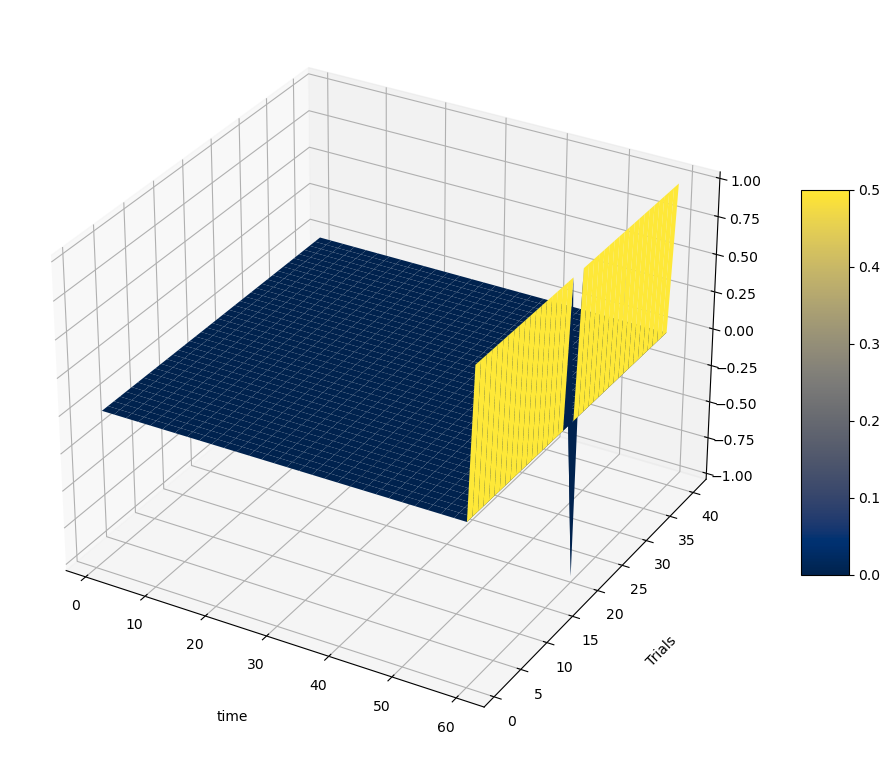

In [6]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

x = np.arange(1, n_timesteps+1)
y = np.arange(1, n_trials+1)

X, Y = np.meshgrid(x, y)
Z = RPE

surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('time', labelpad=20)
ax.set_ylabel('Trials', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

In [22]:
import numpy as np

# Define the environment
states = ['S1', 'S2', 'S3', 'S4']
rewards = {'S1': 0, 'S2': 1, 'S3': 0, 'S4': 10}

# Initialize value estimates for each state
V = {'S1': 0, 'S2': 0, 'S3': 0, 'S4': 0}

# TD(0) learning algorithm
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor

# Simulate episodes
num_episodes = 100
for episode in range(num_episodes):
    # Start in initial state
    current_state = 'S1'
    
    while current_state != 'S4':  # Continue until reaching the terminal state S4
        next_state_index = states.index(current_state) + 1
        next_state = states[next_state_index] if next_state_index < len(states) else 'S4'
        
        # TD(0) update rule
        td_error = rewards[next_state] + gamma * V[next_state] - V[current_state]
        V[current_state] += alpha * td_error
        
        current_state = next_state  # Move to the next state

# Print the learned value estimates
print("Learned value estimates:")
for state in states:
    print(f"{state}: {V[state]}")

Learned value estimates:
S1: 9.084219872920885
S2: 8.997104807521254
S3: 9.999734386011124
S4: 0


In [7]:
import numpy as np

# Define parameters
num_cues = 2  # Number of sensory cues
cue_dimensions = 61  # Dimensionality of each cue vector (time steps)
num_states = 61  # Number of states in the environment (time steps)
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor

# Initialize cue representations and weights
cues = np.zeros((num_cues, cue_dimensions))
cues[0, 10] = 1  # Cue 1 presented at time step 10
cues[1, 20] = 1  # Cue 2 presented at time step 20

weights = np.zeros(num_cues)

# Initialize value estimates for states
V = np.zeros(num_states)

# Simulate TD learning for a single trial
for t in range(num_states - 1):
    # Calculate prediction for the current state based on cue representation and weights
    prediction = np.dot(weights, cues[:, t])
    
    # Simulate reward delivery at time step 60
    if t == 60:
        reward = 1  # Reward delivery
    else:
        reward = 0  # No reward
    
    # Calculate TD error
    td_error = reward + gamma * V[t + 1] - V[t]
    
    # Update weights based on the TD error and cue representation
    weights += alpha * td_error * cues[:, t]
    
    # Update value estimate for the current state
    V[t] += alpha * td_error

# Print learned value estimates for states
print("Learned value estimates:")
print(V)

Learned value estimates:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [3]:
cues

array([[1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]])

In [9]:
import numpy as np

# Define parameters
cue_length = 61  # Length of the sensory cue vector
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor

# Initialize cue representation and weights
cue = np.zeros(cue_length)
weights = np.zeros(cue_length)

# Time step at which the cue is presented
cue_onset_time = 10

# Simulate TD learning for a single trial
for t in range(cue_length - 1):
    # Calculate prediction for the current state based on cue representation and weights
    prediction = np.dot(weights, cue)
    
    # Calculate the time at which the cue is presented
    cue_time = t - cue_onset_time
    
    # Update the cue representation vector based on cue presentation time
    if cue_time >= 0 and cue_time < cue_length:
        cue[cue_time] = 1  # Set the cue presence at the corresponding time step
    
    # Simulate reward delivery at time step 60
    if t == 60:
        reward = 1  # Reward delivery
    else:
        reward = 0  # No reward
    
    # Calculate TD error
    td_error = reward + gamma * prediction - np.dot(weights, cue)
    
    # Update weights based on the TD error and cue representation
    weights += alpha * td_error * cue
    
# Print learned weights for sensory cues
print("Learned weights for sensory cues:")
print(weights)

Learned weights for sensory cues:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


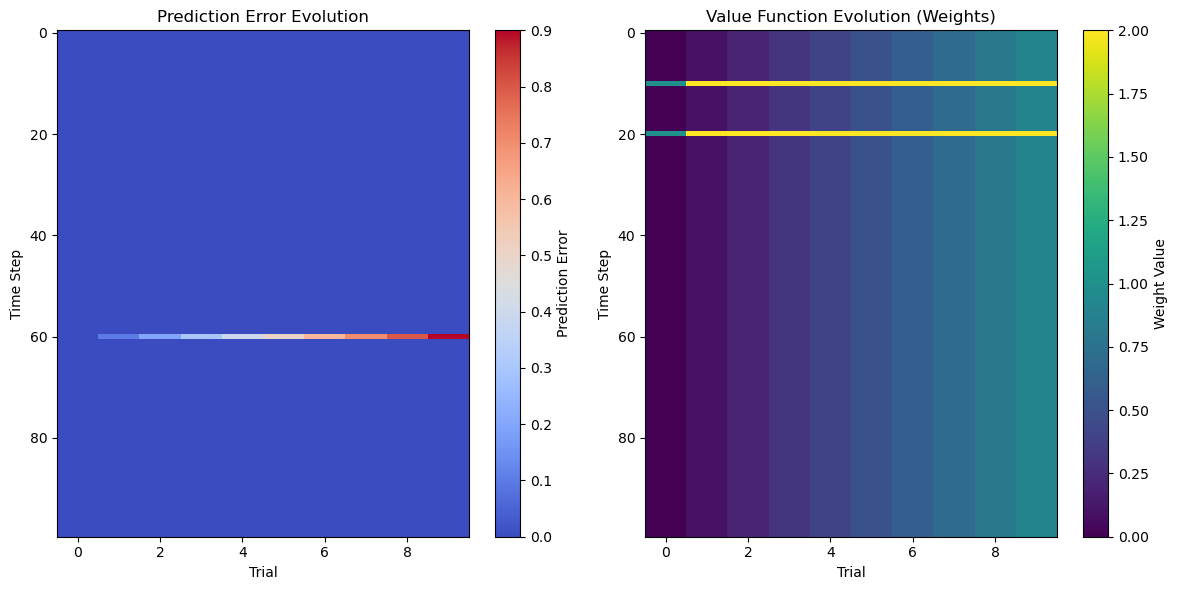

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize variables
num_trials = 10
num_time_steps = 100
weights = np.zeros(num_time_steps)
reward_time = 60
cue_onset_times = [10, 20]
prediction_error = np.zeros((num_trials, num_time_steps))
value_function = np.zeros((num_trials, num_time_steps))

# Simulate training trials
for trial in range(num_trials):
    # Present sensory cues and reward delivery
    for cue_time in cue_onset_times:
        weights[cue_time] += 1  # Update weights for cue presentation

    # Check reward delivery
    if trial != 0 and trial != (num_trials - 1):  # Intermediate trials
        if trial != reward_time:
            # Large negative fluctuation if reward not delivered at expected time
            prediction_error[trial, reward_time] = -5

    # Calculate prediction error
    prediction_error[trial, reward_time] = weights[reward_time]

    # Update value function based on weights
    value_function[trial] = weights

    # Update weights growth
    weights = np.minimum(weights + 0.1, 1)  # Increment weights and saturate at 1

# Plotting
plt.figure(figsize=(12, 6))

# Plot prediction error evolution
plt.subplot(1, 2, 1)
plt.imshow(prediction_error.T, aspect='auto', cmap='coolwarm')
plt.colorbar(label='Prediction Error')
plt.xlabel('Trial')
plt.ylabel('Time Step')
plt.title('Prediction Error Evolution')

# Plot value function (weights)
plt.subplot(1, 2, 2)
plt.imshow(value_function.T, aspect='auto', cmap='viridis')
plt.colorbar(label='Weight Value')
plt.xlabel('Trial')
plt.ylabel('Time Step')
plt.title('Value Function Evolution (Weights)')
plt.tight_layout()
plt.show()

In [4]:
num_trials = 100
num_time_steps = 100
gamma = 0.9  # Discount factor
alpha_x = 0.1  # Learning rate for cue x(t)
sensory_cues = [10, 20]  # Sensory cues at time steps 10 and 20


np.array([int(t in sensory_cues) for t in range(num_time_steps)])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and parameters
num_trials = 100
num_time_steps = 100
gamma = 0.9  # Discount factor
alpha_x = 0.1  # Learning rate for cue x(t)

# Initialize variables
weights = np.zeros(num_time_steps)
value_function = np.zeros((num_trials, num_time_steps))

# Simulate training trials
for trial in range(num_trials):
    # Present sensory cues and reward delivery
    sensory_cues = np.zeros((num_time_steps, 2))  # Matrix for cue representation
    sensory_cues[10:13, 0] = 1  # First cue represented for three time points after onset
    sensory_cues[20, 1] = 1  # Second cue at time step 20
    reward_time = 60  # Reward delivery at time step 60

    # Calculate expected future reward V(t)
    expected_rewards = np.dot(sensory_cues, weights)
    expected_rewards[-1] = 0  # Last time step has no future rewards

    # Calculate prediction error signal (TD error)
    prediction_error = np.roll(expected_rewards * gamma, -1) - expected_rewards
    prediction_error[-1] = reward_time - expected_rewards[-1]

    # Update weights based on prediction error
    weights += alpha_x * np.dot(sensory_cues.T, prediction_error)

    # Update value function V(t) based on weights
    value_function[trial] = expected_rewards[:, 0]

# Plotting value function (weights)
plt.imshow(value_function.T, aspect='auto', cmap='viridis')
plt.colorbar(label='Value Function')
plt.xlabel('Trial')
plt.ylabel('Time Step')
plt.title('Value Function Evolution (Weights)')
plt.show()

ValueError: shapes (100,2) and (100,) not aligned: 2 (dim 1) != 100 (dim 0)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants and parameters
num_trials = 100
num_time_steps = 100
gamma = 0.9  # Discount factor
alpha_x = 0.1  # Learning rate for cue x(t)

# Initialize variables
weights = np.zeros((num_time_steps,))  # Weight for each time step
value_function = np.zeros((num_trials, num_time_steps))

# Simulate training trials
for trial in range(num_trials):
    # Present sensory cues and reward delivery
    sensory_cues = np.zeros((num_time_steps, 2))  # Matrix for cue representation
    sensory_cues[10, 0] = 1  # First cue represented for three time points after onset
    sensory_cues[20, 1] = 1  # Second cue at time step 20
    reward_time = 60  # Reward delivery at time step 60

    # Calculate expected future reward V(t) for each trial
    expected_rewards = np.dot(sensory_cues, weights)  # Shape mismatch error here
    expected_rewards[-1] = 0  # Last time step has no future rewards

    # Calculate prediction error signal (TD error)
    prediction_error = np.roll(expected_rewards * gamma, -1) - expected_rewards
    prediction_error[-1] = reward_time - expected_rewards[-1]

    # Update weights based on prediction error
    weights += alpha_x * np.dot(sensory_cues.T, prediction_error)

    # Update value function V(t) based on weights
    value_function[trial] = expected_rewards

# Creating meshgrid for 3D plotting
trial_mesh, time_mesh = np.meshgrid(np.arange(num_trials), np.arange(num_time_steps))

# Plotting value function (weights) in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(trial_mesh, time_mesh, value_function, cmap='viridis')
ax.set_xlabel('Trial')
ax.set_ylabel('Time Step')
ax.set_zlabel('Value Function')
ax.set_title('Value Function Evolution (Weights)')
plt.show()


ValueError: shapes (100,2) and (100,) not aligned: 2 (dim 1) != 100 (dim 0)